In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
img_path = '../output/cropped_image.jpg'
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

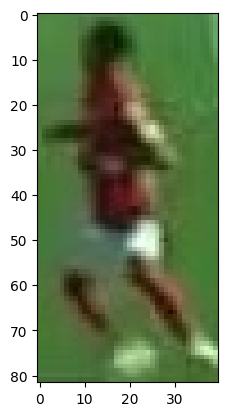

In [3]:
plt.imshow(image)

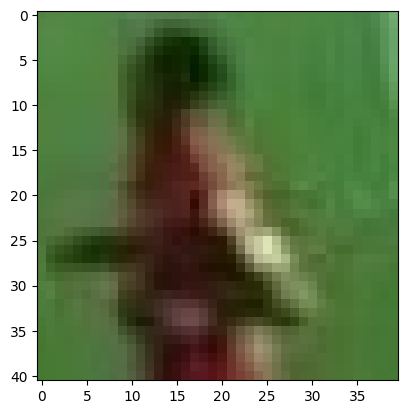

In [7]:
top_half = image[0:int(image.shape[0]/2), :]
plt.imshow(top_half)

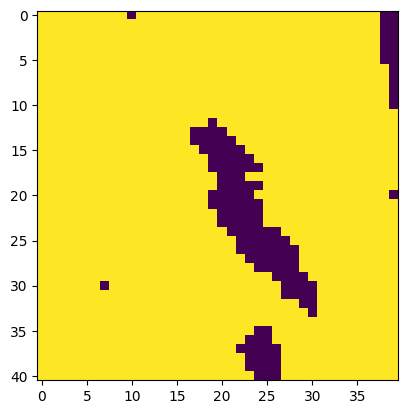

In [22]:
image_2d = top_half.reshape(-1, 3)

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

clustered_image = kmeans.labels_.reshape(top_half.shape[0], top_half.shape[1])

plt.imshow(clustered_image)

In [23]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
background_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(background_cluster)

1


In [24]:
player_cluster = 1-background_cluster
print(player_cluster)

0


In [25]:
kmeans.cluster_centers_[player_cluster]

array([134.42553191, 137.46808511,  95.95035461])